# Mini Proyecto I  
**Fundamentos de Análisis y Cálculo Numérico**  

**Integrantes**:  
- Luz Amelia Ibarguen – 2380404  
- Katherine Lopez Unas – 2380339  
- Andres Mauricio Peña Lopez – 2380335

**Profesor**: Ing. Mateo Echeverry Correa  
**Semestre**: 2025-II  

*Predicción de aprobación de préstamos mediante Red Neuronal Artificial*

In [22]:
# PASO 1. CARGA DEL CSV DESDE GOOGLE DRIVE
import gdown
import os
import warnings

# ocultar warnings 
warnings.filterwarnings('ignore')

# ID del archivo en Google Drive
file_id = "1h-mmgdfKERRObQPQAo4M-M5fVQk-kT8p"  
output = 'loan_approval_dataset.csv'

# Descargar solo si no existe localmente
if not os.path.exists(output):
    print("Descargando dataset desde Google Drive...")
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
else:
    print("Dataset ya existe localmente")

# Cargar el archivo
import pandas as pd
df = pd.read_csv(output)
df.head()

Dataset ya existe localmente


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
# PASO 2. IMPORTACION DE LIBRERIAS Y CARGA DEL CSV

# Manejo de arreglos y de tablas
import numpy as np

# Graficos estadisticos
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")               # estilo predeterminado para graficos de seaborn
plt.rcParams['figure.figsize'] = (10, 6) # tamaño predeterminado para figuras

In [3]:
# PASO 2. LIMPIEZA DE DATOS

print("Forma del dataset:", df.shape)

print("\n------------------------------")
print("\n Información general: \n")
df.info()
print("\n------------------------------")

print("\n Valores nulos por columna:")
print(df.isnull().sum())
print("\n------------------------------")

print("\n Duplicados:", df.duplicated().sum())

# se concluye que el dataset no tiene valores nulos ni duplicados, por tanto esto se omite

Forma del dataset: (4269, 13)

------------------------------

 Información general: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269

In [4]:
# PASO 3. EDA - Resumen estadistico de las columnas numericas
"""
count: cuántos valores no nulos hay
mean: promedio
std: desviación estándar (qué tan dispersos están los datos), entre mas bajito mas consistencia
min / max: valores mínimo y máximo
25% / 50% / 75%: cuartiles (percentiles 25, mediana, percentil 75)
"""

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


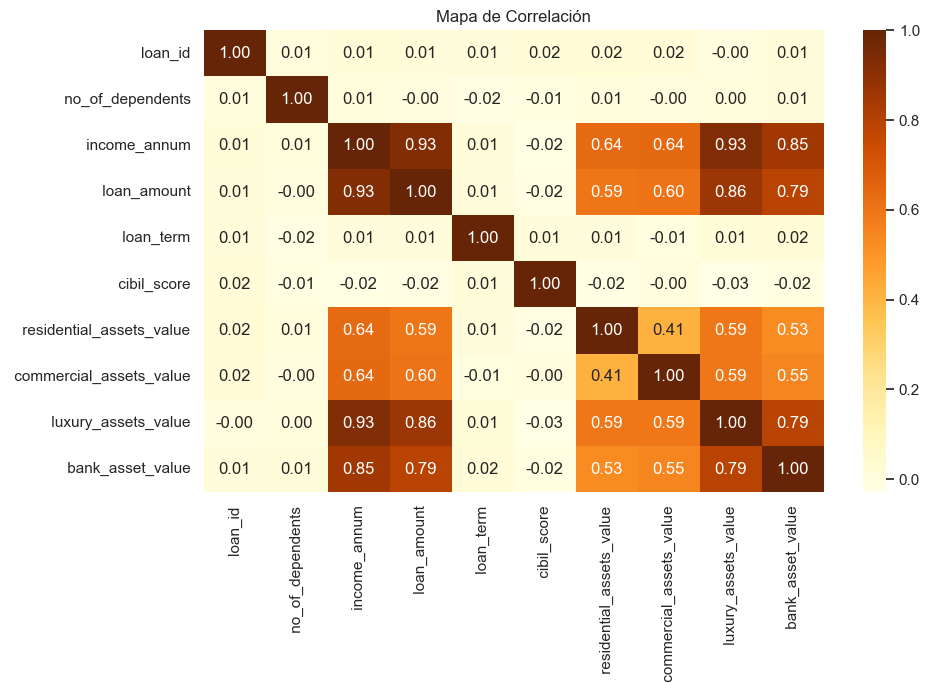

In [5]:
# Armamos un mapa de correlacion entre variables (con el objetivo de ver que tan entrelazadas estan)

numeric_df = df.select_dtypes(include=np.number)  # variables numericas

# calcula la matriz de correlacion de pearson, valores entre -1 y 1 (mas cercano a 1 mas fuerte la relacion)
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrBr', fmt='.2f')  # Amarillo-Naranja-Marrón
plt.title('Mapa de Correlación')
plt.show()

In [6]:
# PASO 4. TRANSFORMACION DE VARIABLES

# traduccion de las variables a español

traduccion = {
    'loan_id': 'id_prestamo',
    'no_of_dependents': 'num_dependientes',
    'education': 'educacion',
    'self_employed': 'trabajo_independiente',
    'income_annum': 'ingresos_anuales',
    'loan_amount': 'monto_prestamo',
    'loan_term': 'plazo_prestamo',
    'cibil_score': 'puntaje_credito',
    'residential_assets_value': 'valor_bienes_residenciales',
    'commercial_assets_value': 'valor_bienes_comerciales',
    'luxury_assets_value': 'valor_bienes_lujo',
    'bank_asset_value': 'valor_activos_bancarios',
    'loan_status': 'estado_prestamo'
}

# limpiar espacios en blanco para nombre de las columnas
df.columns = df.columns.str.strip()
df = df.rename(columns=traduccion)

print("--- Proporcion numerica de prestamos ---")
print(df['estado_prestamo'].value_counts())

print("\n ---Proporcion porcentual ---")
# se cuentan los valores del estado del prestamo y se convierte en una proporcion multiplicada por 100 con 2 decimales
print(df['estado_prestamo'].value_counts(normalize=True).mul(100).round(2))

--- Proporcion numerica de prestamos ---
estado_prestamo
Approved    2656
Rejected    1613
Name: count, dtype: int64

 ---Proporcion porcentual ---
estado_prestamo
Approved    62.22
Rejected    37.78
Name: proportion, dtype: float64


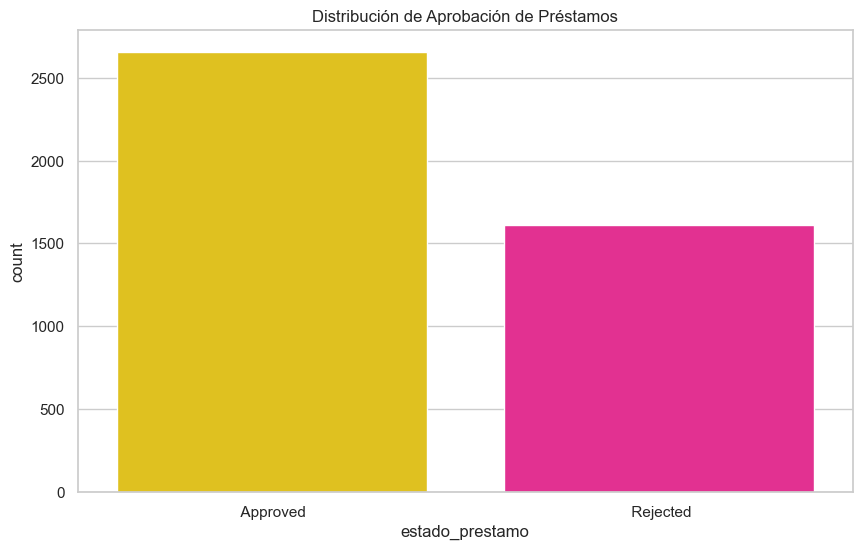

In [7]:
# Grafico de la distribucion de prestamos (Aprobado / NO Aprobado)

# Grafico de conteo - eje x muestra las categorias de estado prestamo y se colorea cada barra segun su propia categoria
sns.countplot(x='estado_prestamo', data=df, hue='estado_prestamo', palette=['#FFD700', '#FF1493'], legend=False)
plt.title('Distribución de Aprobación de Préstamos')
plt.show()

In [15]:
# Preparar las variables para las predicciones 

df.columns = df.columns.str.strip() # limpiar espacios en blanco
df['estado_prestamo'] = df['estado_prestamo'].str.strip() # Limpiar espacios en los valores de la columna

# Separar variables predictoras (X) y variables objetivo (y)
X = df.drop('estado_prestamo', axis=1)  # todas las variables menos estado_prestamo
y = df['estado_prestamo']               # variable objetivo

y = y.map({'Approved': 1, 'Rejected': 0})    # convertir variable objetivo a binaria
y.value_counts()                                # distribucion de clases

estado_prestamo
1    2656
0    1613
Name: count, dtype: int64

In [16]:
# One hot Encoding (Tecnica para convertir variables categoricas a binarias, ej: educacion y el trabajo)

X = pd.get_dummies(X, columns=['educacion', 'trabajo_independiente'], drop_first=True)
X.columns.tolist() # Ver las nuevas columnas generadas 

# educacion : 1. Graduado 2. No Graduado
# trabajo independiente : 1. Si 2. No
# - esta celda solo se debe de ejecutar una vez (en caso de que lo ejecute mas de una vez, ejecute la celda anterior y vuelva a esta)

['id_prestamo',
 'num_dependientes',
 'ingresos_anuales',
 'monto_prestamo',
 'plazo_prestamo',
 'puntaje_credito',
 'valor_bienes_residenciales',
 'valor_bienes_comerciales',
 'valor_bienes_lujo',
 'valor_activos_bancarios',
 'educacion_ Not Graduate',
 'trabajo_independiente_ Yes']

In [17]:
from sklearn.preprocessing import StandardScaler

# estandariza todas las variables numericas a la misma escala (media = 0 y desviacion estandar = 1)
Scaler = StandardScaler() 

X_scaled = Scaler.fit_transform(X) # aprende la media y desviacion de cada columna de X
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # convierte el resultado (array de numpy) en un DataFrame de pandas

In [18]:
# Luego de procesar los datos, confirmamos de que el escalado funciono

print("Forma de X:", X_scaled.shape)        # X_scaled (filas y columnas)
print("Forma de y: ", y.shape)              # Variable objetivo 
print("\n Primeras filas de X escalado: ")
X_scaled.head()                             # 5 filas del conjunto de entrada escalado

Forma de X: (4269, 12)
Forma de y:  (4269,)

 Primeras filas de X escalado: 


,id_prestamo,num_dependientes,ingresos_anuales,monto_prestamo,plazo_prestamo,puntaje_credito,valor_bienes_residenciales,valor_bienes_comerciales,valor_bienes_lujo,valor_activos_bancarios,educacion_ Not Graduate,trabajo_independiente_ Yes
0,-1.731645,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,-0.995559,-1.007288
1,-1.730834,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1.004461,0.992765
2,-1.730022,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,-0.995559,-1.007288
3,-1.729211,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,-0.995559,-1.007288
4,-1.728399,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1.004461,0.992765


In [20]:
# PASO 5. ARQUITECTURA RED NEURONAL

from sklearn.model_selection import train_test_split

"""
train_test_split mezcla y separa esos datos en:
     80% → entrenamiento:
         X_train (características para enseñar al modelo)
         y_train (etiquetas correspondientes)
     20% → validación:
         X_val (características para probar el modelo)
         y_val (etiquetas reales para comparar)"""

X_train, X_val, y_train, y_val = train_test_split(
    # Entradas
    X_scaled, # DataFrame ya normalizado
    y,        # Variable Objetivo

    # Paramatros
    test_size=0.2,   # 20% validacion - 80% entrenamiento
    random_state=42, # asegura que siempre se haga la misma división (reproducibilidad). 
    stratify=y       # Mantiene la proporción de clases (62/38) en ambos conjuntos
)

In [23]:
# Construccion de la red neuronal

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Número de entradas que la primera capa va a esperar
n_features = X_train.shape[1]

# l2 penaliza pesos grandes, evita sobreajuste
model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,), kernel_regularizer=l2(0.001)),  # Capa oculta 1
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),                            # Capa oculta 2
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(
    optimizer='adam',           # optimizador
    loss='binary_crossentropy', # funcion de perdida
    metrics=['accuracy']        # exactitud durante el entrenamiento
)

# resumen de la arquitectura de la red
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Entrenamiento de la red neuronal

early_stopping = EarlyStopping(
    monitor='val_loss',         # metrica a monitorear
    patience=5,                 # numero de epocas sin mejora antes de parar
    restore_best_weights=True   # restaura los pesos de la mejor epoca
)

history = model.fit(
    # datos para aprender
    X_train, y_train, 
    
    epochs=50,                      # maximo 50 vueltas (pero puede parar antes)
    batch_size=32,                  # ajusta los pesos cada 32 ejemplos
    validation_data=(X_val, y_val), # evalua como el modelo generaliza (va aprendiendo en cada epoca)
    callbacks=[early_stopping],     # activacion de la parada temprana
    verbose=1                       # barra de progreso y metricas
)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5930 - loss: 0.7142 - val_accuracy: 0.7892 - val_loss: 0.5861
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7666 - loss: 0.5367 - val_accuracy: 0.9016 - val_loss: 0.3907
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8633 - loss: 0.3870 - val_accuracy: 0.9321 - val_loss: 0.2745
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8846 - loss: 0.3263 - val_accuracy: 0.9379 - val_loss: 0.2342
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8969 - loss: 0.2970 - val_accuracy: 0.9379 - val_loss: 0.2173
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9045 - loss: 0.2757 - val_accuracy: 0.9391 - val_loss: 0.2060
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9174 - loss: 0.2610 - val_accuracy: 0.9426 - val_loss: 0.1976
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9171 - loss: 0.2516 - val_accur

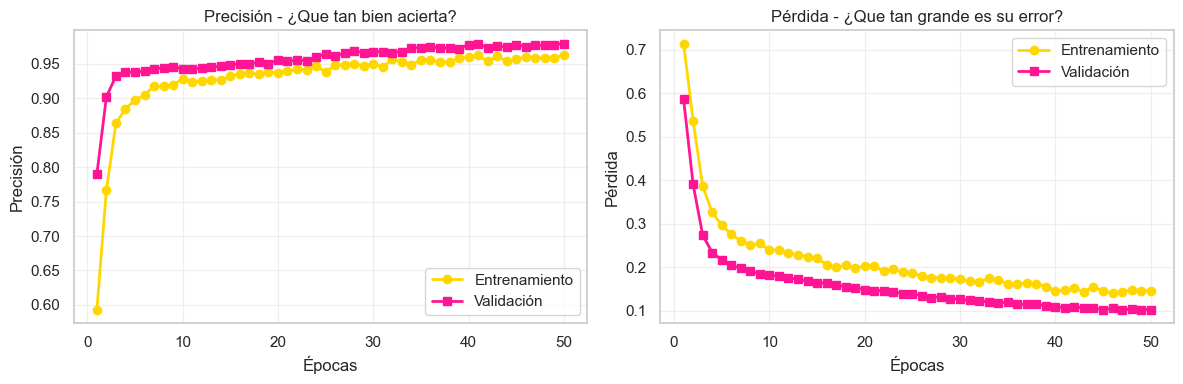

In [27]:
# PASO 6. CURVAS DE ENTRENAMIENTO -> PRECISION Y PERDIDA (se extraen las metricas del historial)

# precision en entrenamiento y validacion
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# perdida en entrenamiento y validacion
loss = history.history['loss']
val_loss = history.history['val_loss']

# lista de numeros que representan el total de epocas
epochs = range(1, len(acc) + 1) 
plt.figure(figsize=(12, 4))

# Precisión 
plt.subplot(1, 2, 1) # crea un espacio para graficos (1 fila, 2 columnas) y selecciona la 1 columna
plt.plot(epochs, acc, color='#FFD700', marker='o', linewidth=2, label='Entrenamiento')   # Grafica la precision en entrenamiento - Amarillo
plt.plot(epochs, val_acc, color='#FF1493', marker='s', linewidth=2, label='Validación')  # Grafica la precision en validacion - Rosa
plt.title('Precisión - ¿Que tan bien acierta?')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3) # muestra en al leyenda quien es entrenamiento y quien validacion

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color='#FFD700', marker='o', linewidth=2, label='Entrenamiento') 
plt.plot(epochs, val_loss, color='#FF1493', marker='s', linewidth=2, label='Validación') 
plt.title('Pérdida - ¿Que tan grande es su error?')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout() # añade margenes a las graficas
plt.show()

|                     | **Predicción: Negativo (0)** | **Predicción: Positivo (1)** |
|---------------------|------------------------------|------------------------------|
| **Real: Negativo (0)** | Verdaderos Negativos (VN) ✅     | Falsos Positivos (FP) ❌|
| **Real: Positivo (1)** | Falsos Negativos (FN) ❌        | Verdaderos Positivos (VP)  ✅   |

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


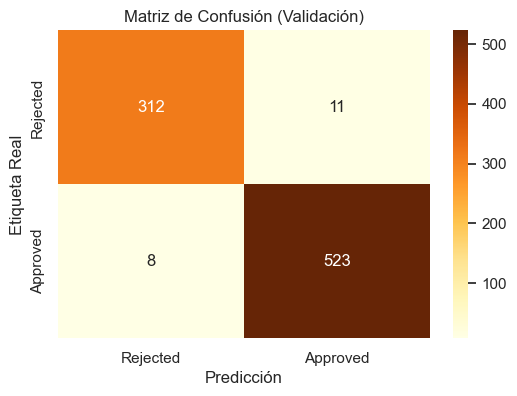

Reporte de Clasificación:
              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97       323
    Approved       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [26]:
# PASO 7. MATRIZ DE CONFUSION Y METRICAS

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Hacer predicciones
y_pred_proba = model.predict(X_val)        # devuelve probabilidades
y_pred = (y_pred_proba > 0.5).astype(int)  # contiene solo un valor binario (0-1)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# real vs lo predic
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Matriz de Confusión (Validación)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_val, y_pred, target_names=['Rejected', 'Approved']))

In [28]:
"""
   Índices donde la predicción fue incorrecta.
   
   compara las etiquetas reales con las predicciones (convierte en un vector de 1D para comparar bien)
   solo toma las filas que no coincidan y esos seran los errores donde fueron mal clasificados
"""
errores = X_val[y_val.values != y_pred.flatten()] 

# Agregar la etiqueta real y la predicha
errores_df = pd.DataFrame(errores)
errores_df['Real'] = y_val.values[y_val.values != y_pred.flatten()] # toma los valores de las etiquetas reales donde hubo error 
errores_df['Predicho'] = y_pred.flatten()[y_val.values != y_pred.flatten()] # toma los valores de las predicciones en las mismas posiciones donde hubo error

print("Ejemplos mal clasificados (primeros 5):")
errores_df.head()

Ejemplos mal clasificados (primeros 5):


,id_prestamo,num_dependientes,ingresos_anuales,monto_prestamo,plazo_prestamo,puntaje_credito,valor_bienes_residenciales,valor_bienes_comerciales,valor_bienes_lujo,valor_activos_bancarios,educacion_ Not Graduate,trabajo_independiente_ Yes,Real,Predicho
2856,0.585871,0.295621,1.154770,1.798939,-0.858444,0.429580,-0.995347,-0.768644,0.227811,0.345654,1.004461,0.992765,0,1
3028,0.725441,-0.883825,-1.054378,-1.209144,1.243677,-0.266435,-0.626279,-0.950940,-0.958652,-1.069816,1.004461,0.992765,1,0
3971,1.490643,0.885344,1.047876,1.776820,-0.858444,-0.684043,1.895682,1.487277,0.777100,0.222570,-0.995559,0.992765,0,1
1199,-0.758710,-0.294102,-1.695744,-1.607273,-1.559151,-1.258255,-1.056858,-1.064876,-1.540897,-1.408298,1.004461,-1.007288,0,1
1625,-0.413031,-0.294102,1.724873,1.998003,-1.208798,-0.782645,2.895240,2.740567,1.018786,0.007172,1.004461,0.992765,1,0


In [29]:
"""
   Índices donde la predicción fue correcta.
   
   compara las etiquetas reales con las predicciones (convierte en un vector de 1D para comparar bien)
   solo toma las filas que coincidan y esos seran los aciertos donde fueron bien clasificados
"""

aciertos = X_val[y_val.values == y_pred.flatten()]

# Agregar la etiqueta real y la predicha
aciertos_df = pd.DataFrame(aciertos)
aciertos_df['Real'] = y_val.values[y_val.values == y_pred.flatten()]  # toma los valores de las etiquetas reales donde hubo acierto
aciertos_df['Predicho'] = y_pred.flatten()[y_val.values == y_pred.flatten()] # toma los valores de las predicciones en las mismas posiciones donde hubo acierto

print("Ejemplos bien clasificados (primeros 5):")
aciertos_df.head()

Ejemplos bien clasificados (primeros 5):


,id_prestamo,num_dependientes,ingresos_anuales,monto_prestamo,plazo_prestamo,puntaje_credito,valor_bienes_residenciales,valor_bienes_comerciales,valor_bienes_lujo,valor_activos_bancarios,educacion_ Not Graduate,trabajo_independiente_ Yes,Real,Predicho
3176,0.845536,0.885344,-0.698064,-0.766779,1.243677,-1.113252,-0.703168,-0.267328,-0.475278,-0.577479,1.004461,0.992765,0,0
477,-1.344581,-0.883825,1.047876,1.854234,0.192617,-0.556441,2.510795,-0.791431,0.766114,0.314883,-0.995559,-1.007288,0,0
4023,1.532839,-1.473548,-0.448644,-0.202764,-0.858444,0.319378,0.327145,-1.133237,-0.716965,-0.731334,1.004461,-1.007288,1,1
134,-1.622910,0.295621,-1.268167,-1.065376,0.893324,0.678985,-0.826191,-0.950940,-1.178367,-1.131358,1.004461,-1.007288,1,1
2064,-0.056802,-1.473548,0.370879,0.936327,1.594031,1.485202,-0.641657,0.051691,0.282740,0.437967,-0.995559,-1.007288,1,1


# Conclusiones

## 🔍 Principales hallazgos

- La red neuronal logró un **desempeño excelente**, alcanzando una alta precisión tanto en el entrenamiento como en la validación, lo que demuestra que aprendió a generalizar bien y no simplemente a "memorizar" los datos.
- El análisis mediante la **matriz de confusión** mostró un número muy bajo de errores: solo 19 errores en más de 854 casos de validación. Esto indica que el modelo es confiable para predecir tanto aprobaciones como rechazos.
- Las variables relacionadas con **ingresos, activos (bienes residenciales, comerciales, etc.) y monto del préstamo** fueron clave para la predicción, ya que presentan una relación clara con la capacidad de pago del cliente.
- El **preprocesamiento de datos** fue fundamental: limpiar, codificar variables categóricas y escalar las numéricas permitió que la red neuronal funcionara de manera estable y eficiente.

## 📚 Lecciones aprendidas

- **Preparar bien los datos es tan importante como diseñar la red**: sin un buen preprocesamiento, incluso el mejor modelo falla.
- Dividir los datos en entrenamiento y validación **manteniendo la proporción de clases** (estratificación) evita sesgos y da una evaluación más justa del modelo.
- Técnicas sencillas como **Dropout** son muy efectivas para evitar que el modelo se sobreajuste y mejoren su desempeño en datos nuevos.

## ⚠️ Limitaciones del modelo

- El conjunto de datos utilizado es **limitado en tamaño y simplicidad**. En la vida real, los factores que afectan la aprobación de un préstamo son más complejos y pueden incluir historial crediticio detallado, comportamiento financiero o contexto económico.
- No se tuvo en cuenta un posible **desequilibrio extremo** entre clases (por ejemplo, si solo el 10% de los préstamos fueran aprobados), aunque en este caso no fue un problema.
- El modelo se limitó a una red neuronal simple. No se comparó con otros métodos más tradicionales, por lo que no podemos afirmar que sea el mejor enfoque posible.

## 🌱 Posibles mejoras futuras

- **Ajustar manualmente los parámetros del modelo** (como el número de capas, neuronas o la tasa de aprendizaje) para ver si se puede mejorar aún más su rendimiento.
- Probar con arquitecturas ligeramente más grandes (más capas o neuronas) para ver si capturan mejor patrones complejos.
- Incluir nuevas variables derivadas, como la relación entre el monto del préstamo y los ingresos anuales, para darle al modelo más información útil.
- Comparar este modelo con otros métodos más simples, como árboles de decisión o regresión logística, para entender cuál funciona mejor en este tipo de problema.
- Utilizar técnicas que ayuden a **entender por qué el modelo toma ciertas decisiones**, haciendo sus predicciones más transparentes y confiables.